In [152]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import BaggingClassifier,RandomForestClassifier
import seaborn as sns
import random
from sklearn.preprocessing import LabelEncoder
from sklearn.utils import shuffle
from sklearn.model_selection import train_test_split,StratifiedKFold

In [153]:
data=pd.read_csv('bank_fraudulant.csv')

In [154]:
data.head()

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
0,1,PAYMENT,9839.64,C1231006815,170136.0,160296.36,M1979787155,0.0,0.0,0,0
1,1,PAYMENT,1864.28,C1666544295,21249.0,19384.72,M2044282225,0.0,0.0,0,0
2,1,TRANSFER,181.00,C1305486145,181.0,0.00,C553264065,0.0,0.0,1,0
3,1,CASH_OUT,181.00,C840083671,181.0,0.00,C38997010,21182.0,0.0,1,0
4,1,PAYMENT,11668.14,C2048537720,41554.0,29885.86,M1230701703,0.0,0.0,0,0


In [155]:
data.shape

(6362620, 11)

In [156]:
data.isnull().sum()

step              0
type              0
amount            0
nameOrig          0
oldbalanceOrg     0
newbalanceOrig    0
nameDest          0
oldbalanceDest    0
newbalanceDest    0
isFraud           0
isFlaggedFraud    0
dtype: int64

In [157]:
data.corr()

,step,amount,oldbalanceOrg,newbalanceOrig,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
step,1.000000,0.022373,-0.010058,-0.010299,0.027665,0.025888,0.031578,0.003277
amount,0.022373,1.000000,-0.002762,-0.007861,0.294137,0.459304,0.076688,0.012295
oldbalanceOrg,-0.010058,-0.002762,1.000000,0.998803,0.066243,0.042029,0.010154,0.003835
newbalanceOrig,-0.010299,-0.007861,0.998803,1.000000,0.067812,0.041837,-0.008148,0.003776
oldbalanceDest,0.027665,0.294137,0.066243,0.067812,1.000000,0.976569,-0.005885,-0.000513
newbalanceDest,0.025888,0.459304,0.042029,0.041837,0.976569,1.000000,0.000535,-0.000529
isFraud,0.031578,0.076688,0.010154,-0.008148,-0.005885,0.000535,1.000000,0.044109
isFlaggedFraud,0.003277,0.012295,0.003835,0.003776,-0.000513,-0.000529,0.044109,1.000000


array([[<AxesSubplot:title={'center':'step'}>,
        <AxesSubplot:title={'center':'amount'}>,
        <AxesSubplot:title={'center':'oldbalanceOrg'}>],
       [<AxesSubplot:title={'center':'newbalanceOrig'}>,
        <AxesSubplot:title={'center':'oldbalanceDest'}>,
        <AxesSubplot:title={'center':'newbalanceDest'}>],
       [<AxesSubplot:title={'center':'isFraud'}>,
        <AxesSubplot:title={'center':'isFlaggedFraud'}>, <AxesSubplot:>]],
      dtype=object)

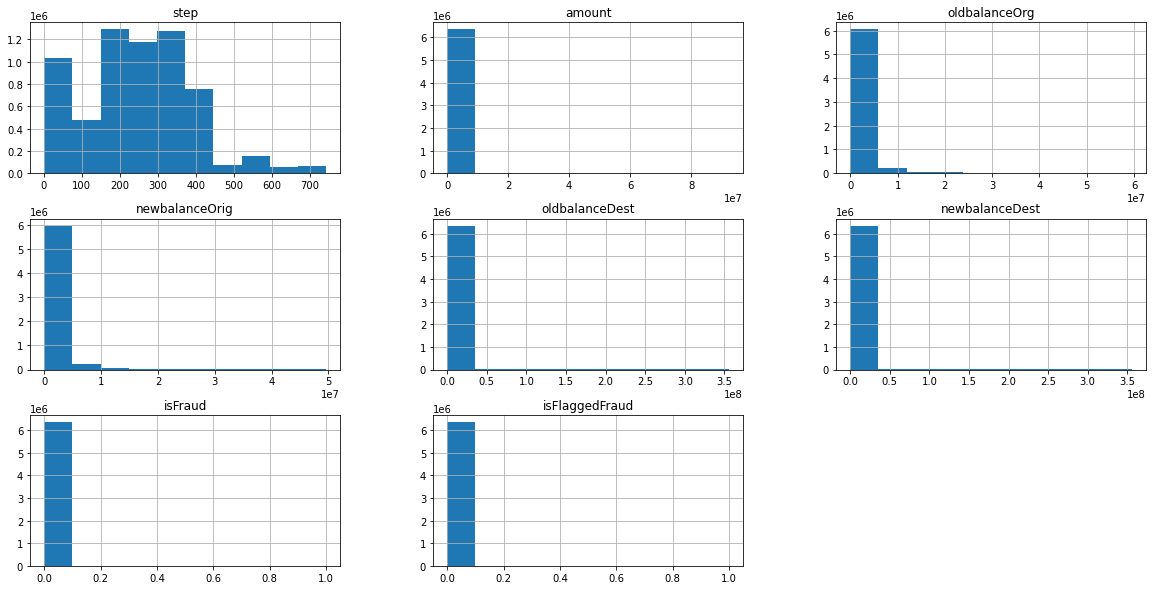

In [158]:
data.hist(figsize=(20,10))

C:\Users\91638\ann\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='isFraud', ylabel='count'>

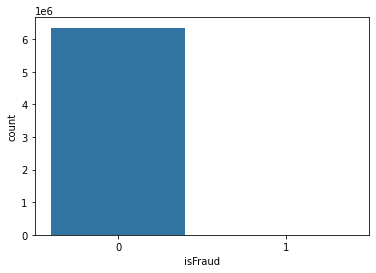

In [159]:
sns.countplot(data['isFraud'])

In [160]:
data['isFraud'].values.tolist().count(1)

8213

In [161]:
data['isFraud'].values.tolist().count(0)

6354407

In [162]:
Total_sample=5000
percent_0=60
percent_1=40
data0=data[data['isFraud']==0].sample(n=int((percent_0*Total_sample/100)))
data1=data[data['isFraud']==1].sample(n=int((percent_1*Total_sample/100)))

In [163]:
print(data0.shape)
data0.head()

(3000, 11)


,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
2929582,229,CASH_IN,207032.85,C1222676401,9454741.99,9661774.84,C1321401876,717365.32,510332.48,0,0
5548252,382,CASH_IN,38844.53,C654004028,19624187.28,19663031.81,C936606326,757357.37,718512.84,0,0
204692,13,PAYMENT,30614.75,C649786018,50586.00,19971.25,M389858870,0.00,0.00,0,0
1309442,136,CASH_OUT,215852.94,C1327127875,0.00,0.00,C991898180,709031.82,924884.76,0,0
2642628,209,CASH_OUT,20756.35,C2110658586,0.00,0.00,C1711314727,74472.28,95228.64,0,0


In [164]:
print(data1.shape)
data1.head()

(2000, 11)


,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
6272962,627,TRANSFER,953529.64,C943173894,953529.64,0.0,C771063877,0.00,0.00,1,0
1059558,104,TRANSFER,125159.20,C1087798823,125159.20,0.0,C1125025410,0.00,0.00,1,0
5212803,370,CASH_OUT,1822772.73,C628490839,1822772.73,0.0,C107223532,0.00,2004899.07,1,0
3193198,244,CASH_OUT,53338.82,C671943963,53338.82,0.0,C1516151145,982332.85,1035671.67,1,0
6082018,521,CASH_OUT,28835.93,C602933297,28835.93,0.0,C950801074,263633.63,292469.56,1,0


In [165]:
sampled_data=pd.concat([data0,data1],axis=0)
sampled_data.shape

(5000, 11)

In [166]:
shuffle_data=shuffle(sampled_data)
shuffle_data.head(100)

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
334773,16,CASH_OUT,142604.06,C956431904,0.00,0.00,C211816165,142810.38,0.00,0,0
5472332,379,CASH_OUT,375654.80,C429252427,0.00,0.00,C1365670477,6848319.79,7223974.59,0,0
1510106,145,CASH_OUT,66448.19,C774736612,66448.19,0.00,C1224889094,5042513.19,5108961.38,1,0
6281471,646,CASH_OUT,10000000.00,C896022572,10000000.00,0.00,C1741236640,0.00,10000000.00,1,0
1038749,94,CASH_IN,158922.91,C922142535,11159.00,170081.91,C499268283,413456.43,254533.53,0,0
...,...,...,...,...,...,...,...,...,...,...,...
761864,38,CASH_OUT,221863.37,C593939260,10782.00,0.00,C1272308916,0.00,221863.37,0,0
3794517,281,TRANSFER,54235.70,C725405279,54235.70,0.00,C2020386791,0.00,0.00,1,0
1254272,134,CASH_OUT,165768.55,C28758614,64088.67,0.00,C128222315,4219764.05,4385532.60,0,0
3036097,234,CASH_OUT,225923.37,C42674436,225923.37,0.00,C491430071,3140128.43,3366051.80,1,0


C:\Users\91638\ann\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='isFraud', ylabel='count'>

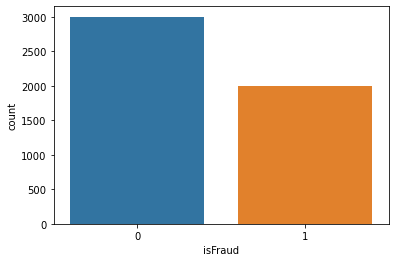

In [167]:
#RANDOM UNDER SAMPLING
sns.countplot(shuffle_data['isFraud'])

In [168]:
label_encoder=LabelEncoder()
columns=shuffle_data.columns
for cols in columns:
   # print(cols)
    if(isinstance(shuffle_data[cols].values[0],str)):
        shuffle_data[cols]=label_encoder.fit_transform(shuffle_data[cols].values)

In [169]:
x=shuffle_data.drop(['isFraud'],axis=1)
y=shuffle_data['isFraud']

In [170]:
x_train,x_test,y_train,y_test=train_test_split(x,y,stratify=y,test_size=0.3,random_state=42)

In [171]:
x_train.shape

(3500, 10)

In [172]:
y_train.shape

(3500,)

In [173]:
y_test.shape

(1500,)

In [174]:
x_train.iloc[0,:]

step                399.00
type                  3.00
amount            26067.38
nameOrig           4516.00
oldbalanceOrg      1190.00
newbalanceOrig        0.00
nameDest           4388.00
oldbalanceDest        0.00
newbalanceDest        0.00
isFlaggedFraud        0.00
Name: 5744053, dtype: float64

In [175]:
Nb=GaussianNB()
Nb.fit(x_train, y_train)
Nb.score(x_test,y_test)

0.688

In [176]:
rf=RandomForestClassifier(n_estimators=200)
rf.fit(x_train, y_train)
rf.score(x_test,y_test)

0.9846666666666667

In [177]:
from sklearn import tree
model = BaggingClassifier(tree.DecisionTreeClassifier(random_state=False))
model.fit(x_train, y_train)
model.score(x_test,y_test) 

0.9826666666666667

In [179]:
pip install opencv-python

  Using cached opencv_python-4.6.0.66-cp36-abi3-win_amd64.whl (35.6 MB)



In [180]:
pip install keras

In [181]:
pip install tensorflow

Note: you may need to restart the kernel to use updated packages.
